In [26]:
import numpy as np
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras import layers
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [27]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print('number of images', x_train.shape[0])

print("number of labels:", len(y_train))

print('size of the test arrays:', x_test.shape[0])

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

4422102/4422102 [==============================] - 0s 0us/step
number of images 60000
number of labels: 60000
size of the test arrays: 10000


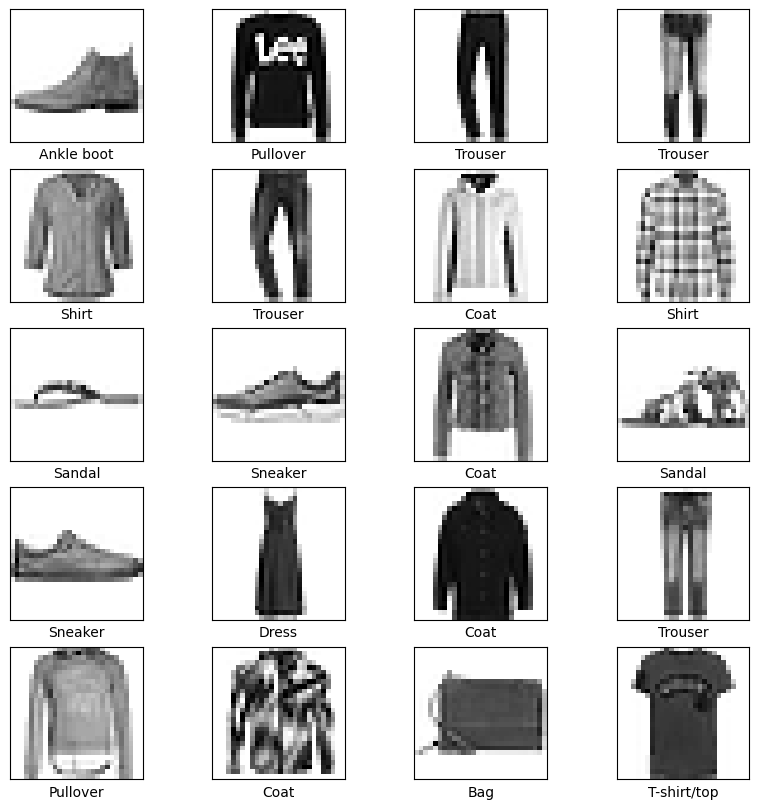

In [28]:
plt.figure(figsize=(10,10))

for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i]])
plt.show()

In [29]:
# Creating CNNs (Convolutional neural networks)
from keras.callbacks import EarlyStopping

In [30]:
def CNNs_model(learning_rate, epochs, batch_size):
    model = Sequential([
        layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.Conv2D(32, (3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.Dropout(0.10),

        layers.Conv2D(64, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.Dropout(0.20),

        layers.Conv2D(128, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.Dropout(0.30),

        layers.Conv2D(256, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.Conv2D(256, (3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.Dropout(0.40),

        layers.Flatten(),
        layers.Dense(1024, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])

    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    early_stopping = EarlyStopping(
        monitor="val_loss",
        patience=10,
        verbose=1,
        restore_best_weights=True)

    history = model.fit(
        x_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        callbacks=[early_stopping])

    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')
    model.summary()

    return model, history

learning_rate = 0.001
epochs = 60
batch_size = 64
model, history_v1 = CNNs_model(learning_rate, epochs, batch_size)

Epoch 1/60
750/750 [==============================] - 148s 192ms/step - loss: 0.6131 - accuracy: 0.7812 - val_loss: 0.4007 - val_accuracy: 0.8503
Epoch 2/60
750/750 [==============================] - 140s 186ms/step - loss: 0.3914 - accuracy: 0.8631 - val_loss: 0.4590 - val_accuracy: 0.8317
Epoch 3/60
750/750 [==============================] - 139s 185ms/step - loss: 0.3494 - accuracy: 0.8776 - val_loss: 0.3607 - val_accuracy: 0.8618
Epoch 4/60
750/750 [==============================] - 139s 185ms/step - loss: 0.3120 - accuracy: 0.8901 - val_loss: 0.3541 - val_accuracy: 0.8760
Epoch 5/60
750/750 [==============================] - 140s 186ms/step - loss: 0.2899 - accuracy: 0.8987 - val_loss: 0.2545 - val_accuracy: 0.9086
Epoch 6/60
750/750 [==============================] - 140s 186ms/step - loss: 0.2761 - accuracy: 0.9048 - val_loss: 0.3055 - val_accuracy: 0.8942
Epoch 7/60
750/750 [==============================] - 139s 185ms/step - loss: 0.2555 - accuracy: 0.9106 - val_loss: 0.2479 -

In [31]:
from google.colab import files
uploaded = files.upload()

Saving model_v1.h5 to model_v1 (1).h5


In [32]:
from keras.models import load_model

In [33]:
# Model from last homework with the best accuracy
old_model = load_model('model_v1.h5')
old_model.summary()

# Last model with the best accuracy from last homework
def fashion_mnist_model_v2(epochs=20, batch_size=32):
    model = Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax'),
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')

    return history
history_v2 = fashion_mnist_model_v2()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_12 (Ba  (None, 512)               2048      
 tchNormalization)                                               
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_13 (Ba  (None, 256)               1024      
 tchNormalization)                                    

313/313 [==============================] - 6s 18ms/step


<Figure size 3000x300 with 0 Axes>

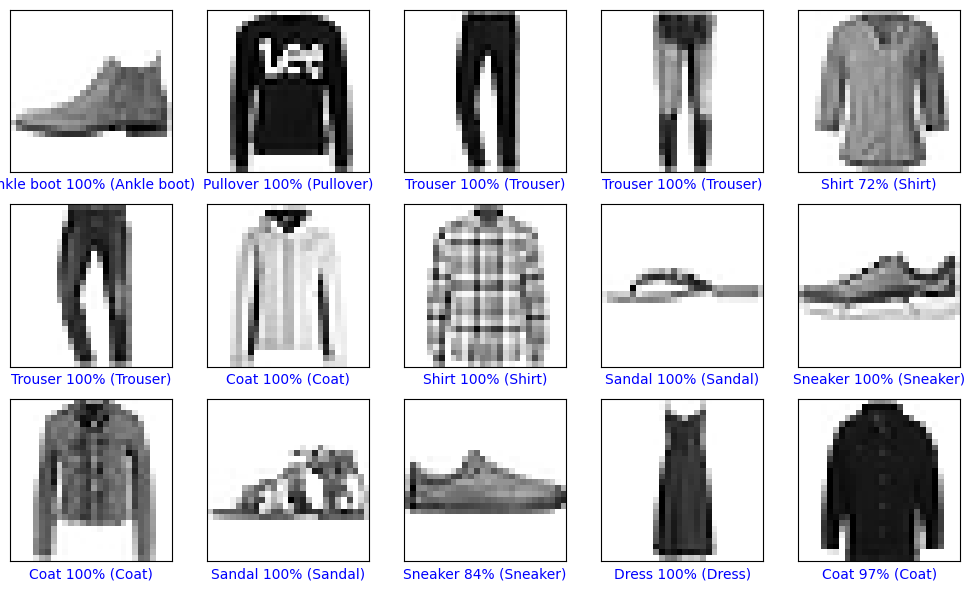

In [34]:
# Predictions by CNNs
predictions = model.predict(x_test)

def plot_image(i, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)


num_images = 15
num_rows = 3
num_cols = 5
plt.figure(figsize=(2*num_images, 3))

plt.figure(figsize=(2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, predictions[i], y_test[i], x_test[i])

plt.tight_layout()
plt.show()

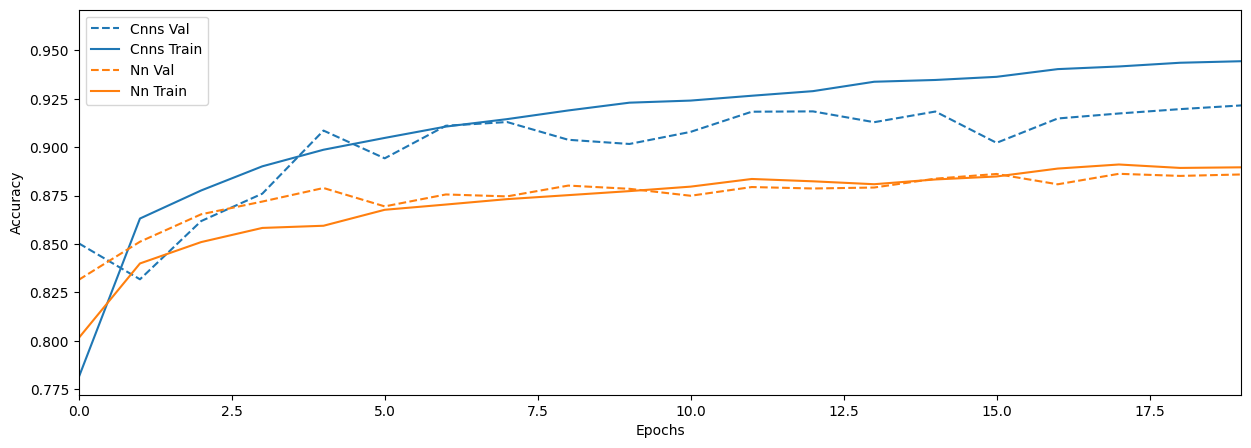

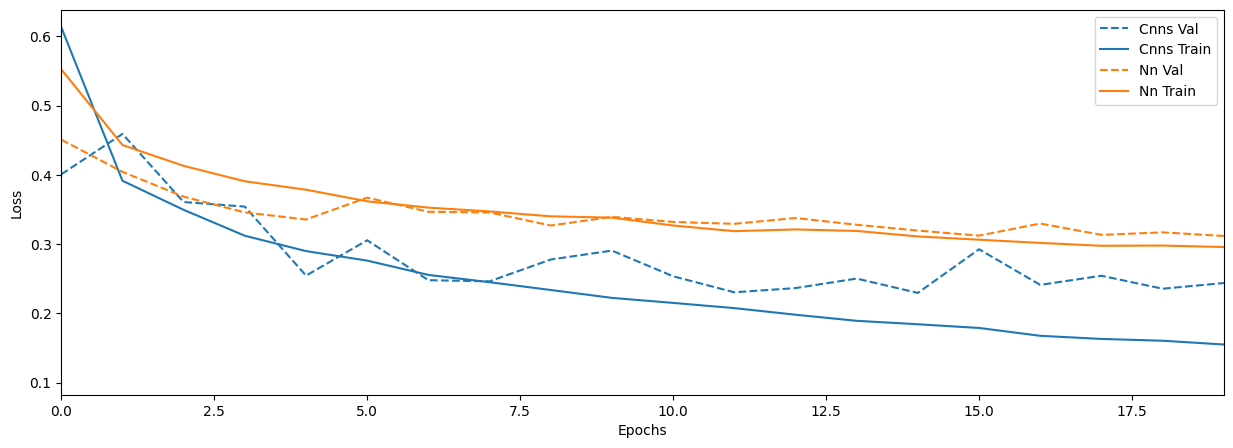

In [35]:
def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(15, 5))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()

    plt.xlim([0, max(history.epoch)])

plot_history([('CNNs', history_v1), ('NN', history_v2)], key='accuracy')
plot_history([('CNNs', history_v1), ('NN', history_v2)], key='loss')

# **Висновки:**

CNNs модель показала не погані результати 92.03% accuracy, також вгадала 15 речей з 15 на другому графіку. В попередньому завдання для повнозєязної нейронної мережі вдалось досягти точності лише 87.63%. CNNs модель продемонструвала високу точність класифікації на тестовому наборі даних, що підтверджує її ефективність та потенціал для застосування в реальних умовах. Отже, згорткові нейронні мережі є більш ефективними для обробки зображень. Але при цьому біль часозатратними принаймні у цьому випадку.